In [80]:
import pandas as pd
import numpy as np
import datetime
from statistics import correlation

In [81]:
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
     
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [82]:
df = pd.read_excel("C:\CLG\PESU IO\Btech PPT\ME\ME PPT 7-2-2023.xlsx")
df

c:\Users\ragha\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SubjectCode,QuestionPaperName,QuestionSerialNumber,Marks,StudentScore,TimeSpentInSeconds,LoginId,SRN
0,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),1,1,0,0,PES1202000608,PES1UG20CS064
1,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),2,1,0,0,PES1202000608,PES1UG20CS064
2,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),3,1,0,92,PES1202000608,PES1UG20CS064
3,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),4,1,0,0,PES1202000608,PES1UG20CS064
4,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),5,1,0,0,PES1202000608,PES1UG20CS064
...,...,...,...,...,...,...,...,...
4295,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),46,1,0,0,S1232,S1232
4296,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),47,1,0,0,S1232,S1232
4297,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),48,1,0,0,S1232,S1232
4298,UE20PT101,APR2020 - CBT - UE20PT101 (set- 1),49,1,0,0,S1232,S1232


In [83]:
print("The number of students who took the test = " + str(len(list(df[" LoginId"].unique()))))

The number of students who took the test = 86


In [84]:
df = df.drop(columns = [" Marks"," QuestionPaperName", "SubjectCode"])
df

,QuestionSerialNumber,StudentScore,TimeSpentInSeconds,LoginId,SRN
0,1,0,0,PES1202000608,PES1UG20CS064
1,2,0,0,PES1202000608,PES1UG20CS064
2,3,0,92,PES1202000608,PES1UG20CS064
3,4,0,0,PES1202000608,PES1UG20CS064
4,5,0,0,PES1202000608,PES1UG20CS064
...,...,...,...,...,...
4295,46,0,0,S1232,S1232
4296,47,0,0,S1232,S1232
4297,48,0,0,S1232,S1232
4298,49,0,0,S1232,S1232


In [85]:
unique_SRN = df[" SRN"].unique()
print("Total number of students who took the test = ", len(unique_SRN))

Total number of students who took the test =  86


In [86]:
cs_attendance = 0
ec_attendance = 0
ee_attendance = 0
me_attendance = 0
bt_attendance = 0

for i in range(len(unique_SRN)):
    if "CS" in unique_SRN[i]:
        cs_attendance += 1
    elif "EC" in unique_SRN[i]:
        ec_attendance += 1
    elif "EE" in unique_SRN[i]:
        ee_attendance += 1
    elif "ME" in unique_SRN[i]:
        me_attendance += 1
    elif "BT" in unique_SRN[i]:
        bt_attendance +=1    

counter = [cs_attendance, ec_attendance, ee_attendance, me_attendance, bt_attendance]
print(counter)   


[5, 5, 2, 73, 0]


CS Report Begins

In [87]:
df.columns = df.columns.str.replace(" SRN", "srn")
df2 = pd.DataFrame()
CS_df = df[df.srn.str.contains("CS", case = False)].copy(deep = True)
CS_df

,QuestionSerialNumber,StudentScore,TimeSpentInSeconds,LoginId,srn
0,1,0,0,PES1202000608,PES1UG20CS064
1,2,0,0,PES1202000608,PES1UG20CS064
2,3,0,92,PES1202000608,PES1UG20CS064
3,4,0,0,PES1202000608,PES1UG20CS064
4,5,0,0,PES1202000608,PES1UG20CS064
...,...,...,...,...,...
4195,46,0,0,PES2202000842,PES2UG20CS539
4196,47,0,0,PES2202000842,PES2UG20CS539
4197,48,0,0,PES2202000842,PES2UG20CS539
4198,49,0,0,PES2202000842,PES2UG20CS539


In [88]:
unique__CS_SRN = CS_df["srn"].unique()
print("The number of CS students who took the test = " +  str(len(unique__CS_SRN)))

The number of CS students who took the test = 5


In [89]:
cs_time = CS_df[" TimeSpentInSeconds"].sum()
cs_time_in_sec = cs_time/len(unique__CS_SRN)
convert(cs_time_in_sec)

'0:15:04'

In [90]:
cs_total_score = CS_df[" StudentScore"].sum()

cs_average_score = round(cs_total_score/len(unique__CS_SRN),2)
cs_average_score

9.4

In [91]:
cs_df_g = CS_df.groupby(" LoginId", as_index = False ).sum()
#bc_df_g
cs_df_g = cs_df_g.drop(columns = [" QuestionSerialNumber"])

cs_top_scorer = cs_df_g.loc[cs_df_g[" StudentScore"].idxmax()]
cs_top_scorer


C:\Users\ragha\AppData\Local\Temp\ipykernel_15488\2286997245.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cs_df_g = CS_df.groupby(" LoginId", as_index = False ).sum()


 LoginId               PES2202000304
 StudentScore                     20
 TimeSpentInSeconds             2546
Name: 3, dtype: object

In [92]:
cs_lowest = cs_df_g.loc[cs_df_g[" StudentScore"].idxmin()]
cs_lowest

 LoginId               PES2202000842
 StudentScore                      0
 TimeSpentInSeconds               14
Name: 4, dtype: object

In [93]:
cs_corrcoeff = np.corrcoef(cs_df_g[" TimeSpentInSeconds"], cs_df_g[" StudentScore"])
cs_pcc = cs_corrcoeff[0][1]
print(cs_pcc)
if cs_pcc > -0.2 and cs_pcc < 0.2:
    print("There exists a weak linear relationship between time spent and marks scored.")
elif (cs_pcc > 0.2 and cs_pcc < 0.7) or (cs_pcc > -0.7 and cs_pcc < -0.2):
    print("There exists a mild linear realtionship between time spent and marks scored.")     
elif (cs_pcc <= 1 and cs_pcc > 0.7) or (cs_pcc > -1 and cs_pcc < -0.7):
    print("There exist a strong linear relationship between time spent and marks scored.")   
    

0.8203262002473568
There exist a strong linear relationship between time spent and marks scored.


CS Report Ends

EC Report Begins

In [94]:
EC_df = df[df.srn.str.contains("EC", case = False)].copy(deep = True)
EC_df

,QuestionSerialNumber,StudentScore,TimeSpentInSeconds,LoginId,srn
3050,1,0,17,PES1202001982,PES1UG20EC254
3051,2,0,3,PES1202001982,PES1UG20EC254
3052,3,0,3,PES1202001982,PES1UG20EC254
3053,4,0,14,PES1202001982,PES1UG20EC254
3054,5,1,2,PES1202001982,PES1UG20EC254
...,...,...,...,...,...
4245,46,1,43,PES2202000973,PES2UG20EC161
4246,47,1,51,PES2202000973,PES2UG20EC161
4247,48,0,59,PES2202000973,PES2UG20EC161
4248,49,0,23,PES2202000973,PES2UG20EC161


In [95]:
unique__EC_SRN = EC_df["srn"].unique()
print("The number of EC students who took the test = " +  str(len(unique__EC_SRN)))

The number of EC students who took the test = 5


In [96]:
ec_time = EC_df[" TimeSpentInSeconds"].sum()
ec_time_in_sec = ec_time/len(unique__EC_SRN)
convert(ec_time_in_sec)

'0:22:31'

In [97]:
ec_total_score = EC_df[" StudentScore"].sum()
ec_average_score = round(ec_total_score/len(unique__EC_SRN),2)
ec_average_score

13.8

In [98]:
ec_df_g = EC_df.groupby(" LoginId", as_index = False ).sum()
#bc_df_g
ec_df_g = ec_df_g.drop(columns = [" QuestionSerialNumber"])

ec_top_scorer = ec_df_g.loc[ec_df_g[" StudentScore"].idxmax()]
ec_top_scorer

C:\Users\ragha\AppData\Local\Temp\ipykernel_15488\719251800.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ec_df_g = EC_df.groupby(" LoginId", as_index = False ).sum()


 LoginId               PES2202000358
 StudentScore                     17
 TimeSpentInSeconds             1453
Name: 2, dtype: object

In [99]:
ec_lowest = ec_df_g.loc[ec_df_g[" StudentScore"].idxmin()]
ec_lowest

 LoginId               PES2202000374
 StudentScore                     12
 TimeSpentInSeconds             1162
Name: 3, dtype: object

In [100]:
ec_corrcoeff = np.corrcoef(ec_df_g[" TimeSpentInSeconds"], ec_df_g[" StudentScore"])
ec_pcc = ec_corrcoeff[0][1]
print(ec_pcc)
if ec_pcc > -0.2 and ec_pcc < 0.2:
    print("There exists a weak linear relationship between time spent and marks scored.")
elif (ec_pcc > 0.2 and ec_pcc < 0.7) or (ec_pcc > -0.7 and ec_pcc < -0.2):
    print("There exists a mild linear realtionship between time spent and marks scored.")     
elif (ec_pcc <= 1 and ec_pcc > 0.7) or (ec_pcc > -1 and ec_pcc < -0.7):
    print("There exist a strong linear relationship between time spent and marks scored.")   
    

-0.028031679867685056
There exists a weak linear relationship between time spent and marks scored.


EC Report Ends

EE Report Ends

In [101]:
EE_df = df[df.srn.str.contains("EE", case = False)].copy(deep = True)
EE_df

,QuestionSerialNumber,StudentScore,TimeSpentInSeconds,LoginId,srn
3600,1,1,62,PES1202102674,PES1UG21EE803
3601,2,0,123,PES1202102674,PES1UG21EE803
3602,3,1,25,PES1202102674,PES1UG21EE803
3603,4,1,46,PES1202102674,PES1UG21EE803
3604,5,1,104,PES1202102674,PES1UG21EE803
...,...,...,...,...,...
3995,46,1,56,PES1202102875,PES1UG21EE804
3996,47,0,21,PES1202102875,PES1UG21EE804
3997,48,0,5,PES1202102875,PES1UG21EE804
3998,49,0,19,PES1202102875,PES1UG21EE804


In [102]:
unique__EE_SRN = EE_df["srn"].unique()
print("The number of EE students who took the test = " +  str(len(unique__EE_SRN)))

The number of EE students who took the test = 2


In [103]:
ee_time = EE_df[" TimeSpentInSeconds"].sum()
ee_time_in_sec = ee_time/len(unique__EE_SRN)
convert(ee_time_in_sec)

'0:34:21'

In [104]:
ee_total_score = EE_df[" StudentScore"].sum()
ee_average_score = round(ee_total_score/len(unique__EE_SRN),2)
ee_average_score

24.5

In [105]:
ee_df_g = EE_df.groupby(" LoginId", as_index = False ).sum()
#bc_df_g
ee_df_g = ee_df_g.drop(columns = [" QuestionSerialNumber"])

ee_top_scorer = ee_df_g.loc[ee_df_g[" StudentScore"].idxmax()]
ee_top_scorer

C:\Users\ragha\AppData\Local\Temp\ipykernel_15488\3305314139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ee_df_g = EE_df.groupby(" LoginId", as_index = False ).sum()


 LoginId               PES1202102674
 StudentScore                     32
 TimeSpentInSeconds             2633
Name: 0, dtype: object

In [106]:
ee_lowest = ee_df_g.loc[ee_df_g[" StudentScore"].idxmin()]
ee_lowest

 LoginId               PES1202102875
 StudentScore                     17
 TimeSpentInSeconds             1489
Name: 1, dtype: object

In [107]:
ee_corrcoeff = np.corrcoef(ee_df_g[" TimeSpentInSeconds"], ee_df_g[" StudentScore"])
ee_pcc = ee_corrcoeff[0][1]
print(ee_pcc)
if ee_pcc > -0.2 and ee_pcc < 0.2:
    print("There exists a weak linear relationship between time spent and marks scored.")
elif (ee_pcc > 0.2 and ee_pcc < 0.7) or (ee_pcc > -0.7 and ee_pcc < -0.2):
    print("There exists a mild linear realtionship between time spent and marks scored.")     
elif (ee_pcc <= 1 and ee_pcc > 0.7) or (ee_pcc > -1 and ee_pcc < -0.7):
    print("There exist a strong linear relationship between time spent and marks scored.")   
    

0.9999999999999998
There exist a strong linear relationship between time spent and marks scored.


EE Report Ends

ME Report Begins

In [108]:
ME_df = df[df.srn.str.contains("ME", case = False)].copy(deep = True)
ME_df

,QuestionSerialNumber,StudentScore,TimeSpentInSeconds,LoginId,srn
50,1,1,40,PES1202000818,PES1UG20ME013
51,2,0,9,PES1202000818,PES1UG20ME013
52,3,1,105,PES1202000818,PES1UG20ME013
53,4,1,101,PES1202000818,PES1UG20ME013
54,5,1,94,PES1202000818,PES1UG20ME013
...,...,...,...,...,...
3945,46,0,1,PES1202102865,PES1UG21ME812
3946,47,0,16,PES1202102865,PES1UG21ME812
3947,48,0,89,PES1202102865,PES1UG21ME812
3948,49,0,23,PES1202102865,PES1UG21ME812


In [109]:
unique__ME_SRN = ME_df["srn"].unique()
print("The number of ME students who took the test = " +  str(len(unique__ME_SRN)))

The number of ME students who took the test = 73


In [110]:
me_time = ME_df[" TimeSpentInSeconds"].sum()
me_time_in_sec = me_time/len(unique__ME_SRN)
convert(me_time_in_sec)

'0:31:51'

In [111]:
me_total_score = ME_df[" StudentScore"].sum()
me_average_score = round(me_total_score/len(unique__ME_SRN),2)
me_average_score

21.11

In [112]:
me_df_g = ME_df.groupby(" LoginId", as_index = False ).sum()
#bc_df_g
me_df_g = me_df_g.drop(columns = [" QuestionSerialNumber"])

me_top_scorer = me_df_g.loc[me_df_g[" StudentScore"].idxmax()]
me_top_scorer

C:\Users\ragha\AppData\Local\Temp\ipykernel_15488\777761913.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  me_df_g = ME_df.groupby(" LoginId", as_index = False ).sum()


 LoginId               PES1202000927
 StudentScore                     37
 TimeSpentInSeconds             2739
Name: 1, dtype: object

In [113]:
me_lowest = me_df_g.loc[me_df_g[" StudentScore"].idxmin()]
me_lowest

 LoginId               PES1202001943
 StudentScore                      5
 TimeSpentInSeconds              359
Name: 57, dtype: object

In [114]:
me_corrcoeff = np.corrcoef(me_df_g[" TimeSpentInSeconds"], me_df_g[" StudentScore"])
me_pcc = me_corrcoeff[0][1]
print(me_pcc)
if me_pcc > -0.2 and me_pcc < 0.2:
    print("There exists a weak linear relationship between time spent and marks scored.")
elif (me_pcc > 0.2 and me_pcc < 0.7) or (me_pcc > -0.7 and me_pcc < -0.2):
    print("There exists a mild linear realtionship between time spent and marks scored.")     
elif (me_pcc <= 1 and me_pcc > 0.7) or (me_pcc > -1 and me_pcc < -0.7):
    print("There exist a strong linear relationship between time spent and marks scored.")   
    

0.49771302454204147
There exists a mild linear realtionship between time spent and marks scored.


ME Report Ends

Graphs

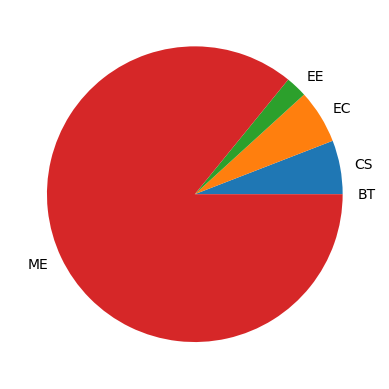

In [115]:
import matplotlib.pyplot as plt

chart = np.array([cs_attendance, ec_attendance, ee_attendance, me_attendance, bt_attendance])
branch_label = ["CS", "EC", "EE", "ME", "BT"]
plt.pie(chart, labels = branch_label)
plt.show()

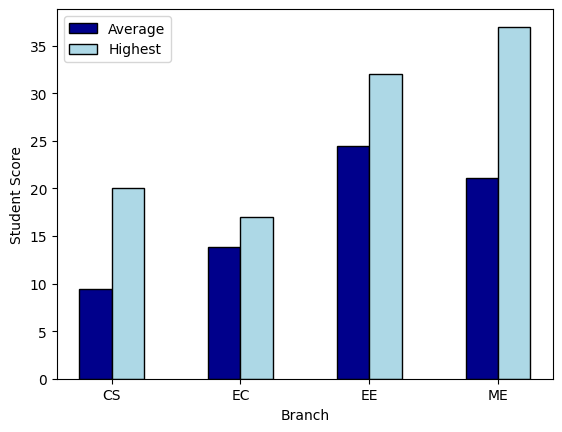

In [121]:
highest = [cs_top_scorer[1], ec_top_scorer[1], ee_top_scorer[1], me_top_scorer[1]]
average = [cs_average_score, ec_average_score, ee_average_score, me_average_score]

n = 4
r =np.arange(n)
width = 0.25
plt.bar(r, average, color = "darkblue", width = width, edgecolor = "black", label = "Average")
plt.bar(r + width, highest, color = "lightblue", width = width, edgecolor = "black", label = "Highest")
plt.xticks(r + width/2, ["CS", "EC", "EE", "ME"])
plt.legend()
plt.xlabel("Branch")
plt.ylabel("Student Score")
plt.show()

BT Report Begins

In [117]:
BT_df = df[df.srn.str.contains("BT", case = False)].copy(deep = True)
BT_df

,QuestionSerialNumber,StudentScore,TimeSpentInSeconds,LoginId,srn


Overall Report

In [118]:
total_average = round((cs_average_score + 0 + ec_average_score + ee_average_score)/4,2)
print("Average = " + str(total_average))

Average = 11.92


In [119]:
total_time = df[" TimeSpentInSeconds"].sum()
avg_time = total_time/len(unique_SRN)
convert(avg_time)

'0:30:02'

In [120]:
ovr_highest = max(cs_top_scorer[1], ec_top_scorer[1], ee_top_scorer[1], 0)
print(ovr_highest)
ovr_lowest = min(cs_lowest[1], ec_lowest[1], ee_lowest[1])
print(ovr_lowest)

32
0
